In [48]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Carrega o dataset


In [49]:
url = "https://raw.githubusercontent.com/tuliofor/dados_aula/refs/heads/main/Salary_Data.csv"
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [19]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
df.shape

(30, 2)

O dataset não tem valores duplicados ou nulos , ou seja não precisamos limpar os dados

In [51]:
x =df['YearsExperience'].values #values transforma em array do numpy
x = x.reshape(len(x),1) # muda para matrix
y =df['Salary'].values
y = y.reshape(len(y),1)
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
scaler_X = StandardScaler()#deixa os dados com media = 0 e desvio padrao = 1 ,usado quando o modelo é sensivel a escala dos dados
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(x_train)
X_test_scaled = scaler_X.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()


In [54]:
svr = SVR(kernel='rbf') #modelo suport vector
svr.fit(X_train_scaled, y_train_scaled) # treino
y_pred_svr_scaled = svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1,1)).ravel()

# 2. Treinar Decision Tree
dtr = DecisionTreeRegressor(random_state=42) # modelo decision tree
dtr.fit(x_train, y_train) # treino
y_pred_dtr = dtr.predict(x_test)

# 3. Treinar Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42) #modelo random forest
rfr.fit(x_train, y_train) # treino
y_pred_rfr = rfr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [55]:
def avaliar_modelo(y_true, y_pred, nome): #avaliação do modelo
    mae = mean_absolute_error(y_true, y_pred) #MAE
    r2 = r2_score(y_true, y_pred) #R2 Score
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) #RMSE
    print(f'{nome} - MAE: {mae:.2f}, R2: {r2:.4f} , RMSE: {rmse:.4f}')
    return mae, r2,rmse

In [56]:
mae_svr, r2_svr, rmse_svr = avaliar_modelo(y_test, y_pred_svr, 'SVR')
mae_dtr, r2_dtr, rmse_dtr = avaliar_modelo(y_test, y_pred_dtr, 'Decision Tree')
mae_rfr, r2_rfr, rmse_rfr = avaliar_modelo(y_test, y_pred_rfr, 'Random Forest')

SVR - MAE: 5800.14, R2: 0.8936 , RMSE: 7370.9994
Decision Tree - MAE: 8640.17, R2: 0.8022 , RMSE: 10052.2490
Random Forest - MAE: 6872.01, R2: 0.8753 , RMSE: 7982.5516


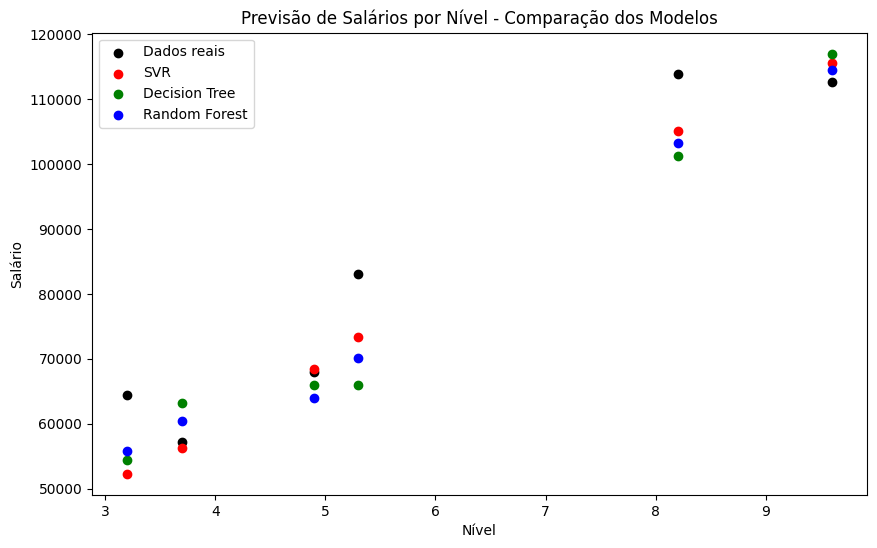

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='black', label='Dados reais')
plt.scatter(x_test, y_pred_svr, color='red', label='SVR')
plt.scatter(x_test, y_pred_dtr, color='green', label='Decision Tree')
plt.scatter(x_test, y_pred_rfr, color='blue', label='Random Forest')
plt.xlabel('Nível')
plt.ylabel('Salário')
plt.title('Previsão de Salários por Nível - Comparação dos Modelos')
plt.legend()
plt.show()


Considerações : svr teve a melhor performance dos 3 oque coloca ele como o escolhido , suas metricas todas foram menores que seus concorrentes

6 6
6 6
6 6


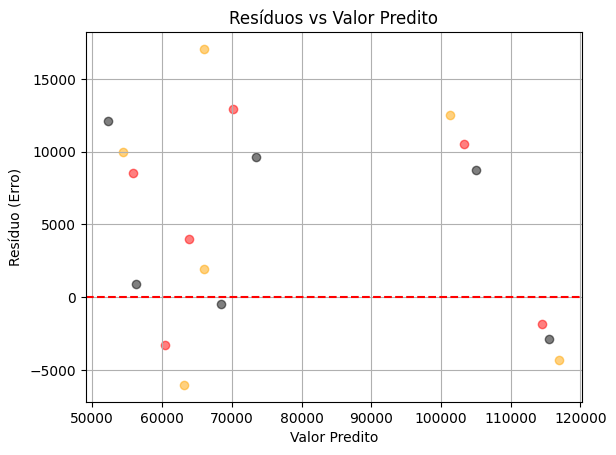

In [68]:
residuos_svr = y_test.ravel() - y_pred_svr
residuos_dtr = y_test.ravel() - y_pred_dtr
residuos_rfr = y_test.ravel() - y_pred_rfr
print(len(residuos_svr),len(y_pred_svr))
print(len(residuos_dtr),len(y_pred_dtr))
print(len(residuos_rfr),len(y_pred_rfr))
plt.scatter(y_pred_svr, residuos_svr, alpha=0.5,color='black',label='svr')
plt.scatter(y_pred_dtr, residuos_dtr, alpha=0.5,color='orange',label='dtr')
plt.scatter(y_pred_rfr, residuos_rfr, alpha=0.5,color='red',label='rfr')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduo (Erro)')
plt.title('Resíduos vs Valor Predito')
plt.grid(True)
plt.show()
